### European Call Option

In [51]:
import numpy as num
import math

In [52]:
# Monte Carlo for European options


# Step 1. Define parameters

S = 50.;            # Current asset value
E = 52.;            # Strike price
T = 1.;             # Expiration time
r = 0.06;           # Risk free rate
sigma = 0.1;        # Volatility

M=500;              # Number of samples

# Step 2. Create a vector holding put and call values for each random sample

Vcall = num.zeros((M,1));
Vput = num.zeros((M,1));

for i in range(0,M):
  Sfinal = S*num.exp((r-0.5*sigma**2)*T+sigma*math.sqrt(T)*num.random.normal(0,1,1))
  Vput[i]=math.exp(-r*T)*num.maximum(E-Sfinal,0) # Discounted payoff for a European put
  Vcall[i]=math.exp(-r*T)*num.maximum(Sfinal-E,0)# Discounted payoff for a European call

#Question from previous years is write this code without a for loop

# Step 3. Compute sample mean and standard deviation

aMput=num.mean(Vput);
bMput=num.std(Vput);

aMcall=num.mean(Vcall);
bMcall=num.std(Vcall);

# Step 4. Compute 95% confidence intervals for put and call values.

confPut = [aMput-1.96*bMput/math.sqrt(M),aMput+1.96*bMput/math.sqrt(M)];
confCall = [aMcall-1.96*bMcall/math.sqrt(M),aMcall+1.96*bMcall/math.sqrt(M)];

# Step 5. Direct calculation from Black-Scholes for put and call options

d1 = (math.log(S/E)+(r+0.5*sigma**2)*T)/(sigma*math.sqrt(T));
d2=d1-sigma*math.sqrt(T);
N1=0.5*(1+math.erf(d1/math.sqrt(2)));
N2=0.5*(1+math.erf(d2/math.sqrt(2)));

bsCall=S*N1-E*math.exp(-r*T)*N2 
bsPut=E*math.exp(-r*T)*(1-N2)+S*(N1-1) 


# Step 6. Output Monte Carlo confidence intervals and Black-Scholes values
print(confPut)
print(bsPut)
print(confCall)
print(bsCall)



[1.3972812525493485, 1.8172244913945939]
1.5016697395038712
[1.9282356436177113, 2.4968004551229344]
2.5299139931229355


In [53]:
vc =Vcall

In [54]:
Vcall = num.zeros((M, 1))
Vput = num.zeros((M, 1))

# Generate M random samples in a single step for efficiency
Sfinal = S * num.exp((r - 0.5 * sigma**2) * T + sigma * math.sqrt(T) * num.random.normal(0, 1, M))

# Calculate discounted payoff for both put and call options
Vput[:, 0] = num.exp(-r * T) * num.maximum(E - Sfinal, 0)  # Discounted payoff for a European put
Vcall[:, 0] = num.exp(-r * T) * num.maximum(Sfinal - E, 0) # Discounted payoff for a European call


In [55]:
pl = num.zeros(5)
lp = num.zeros(5)
for i in range(5):
    lp[i] = num.random.normal(0,1,1)

pl[:,] = num.random.normal(0,1,5)

In [56]:
pl,lp

(array([ 1.62754588,  1.11432065,  0.62589322,  1.95556096, -0.3195465 ]),
 array([ 0.13641358, -0.57108774,  0.10285501,  0.29720617, -1.54089699]))

### Monte Carlo Delta

###### Exercise 2

In [57]:
import numpy as num
import math

# Step 1. Define parameters
S = 50.;           # Current asset value
h = 0.1;          # Size of perturbation of current asset value 
E = 52.;           # Strike price
T = 1.;            # Expiration time
r = 0.06;         # Risk free rate
sigma = 0.1;      # Volatility

M=1000;            # Number of samples

# Step 2. Create a vector holding put values for each random sample

Vcall = num.zeros((M,1));
Vhcall = num.zeros((M,1))
Vput = num.zeros((M,1));
Vhput = num.zeros((M,1))

for i in range(0,M):
    Sfinal = S*num.exp((r-0.5*sigma**2)*T+sigma*math.sqrt(T)*num.random.normal(0,1,1));
    Shfinal = (S+h)*num.exp((r-0.5*sigma**2)*T+sigma*math.sqrt(T)*num.random.normal(0,1,1));
    Vput[i]=num.exp(-r*T)*num.maximum(E-Sfinal,0); # Discounted payoff for a European put
    Vhput[i]=num.exp(-r*T)*num.maximum(E-Shfinal,0); # Discounted payoff for perturbed European put
    Vcall[i] = num.exp(-r*T)*num.maximum(Sfinal-E,0)
    Vhcall[i] = num.exp(-r*T)*num.maximum(Shfinal-E,0)

# Step 3. Compute delta for put 

aMput=num.mean(Vput);
aMhput=num.mean(Vhput);

bMput = num.std(Vput);
bMhput = num.std(Vhput);

delta_put = (aMhput-aMput)/h;
conf_put = [delta_put-1.96*(bMput+bMhput)/(h*math.sqrt(M)),delta_put+1.96*(bMput+bMhput)/(h*math.sqrt(M))];

#Step 3. Compute delta for call
aMcall=num.mean(Vcall);
aMhcall=num.mean(Vhcall);

bMcall = num.std(Vcall);
bMhcall = num.std(Vhcall);

delta_call = (aMhcall-aMcall)/h;
conf_call = [delta_call-1.96*(bMcall+bMhcall)/(h*math.sqrt(M)),delta_call + 1.96*(bMcall + bMhcall)/(h*math.sqrt(M))];

# Step 4. Direct calculation 

d1 = (math.log(S/E)+(r+0.5*sigma**2)*T)/(sigma*math.sqrt(T));
N1=0.5*(1+math.erf(d1/math.sqrt(2)));


# Step 5. Output Monte Carlo estimate of delta and true value confidence intervals and Black-Scholes values

#put
print("PUT OPTION")
print(f"Monte Carlo Delta Estimate: {delta_put}")
print(f"95% Confidence Interval: {conf_put}")
print(f"Exact Delta (Black-Scholes): {N1-1}")
print("\n")
#call
print("CALL OPTION")
print(f"Monte Carlo Delta Estimate: {delta_call}")
print(f"95% Confidence Interval: {conf_call}")
print(f"Exact Delta (Black-Scholes): {N1}")

PUT OPTION
Monte Carlo Delta Estimate: -1.91144548365495
95% Confidence Interval: [-4.966326685245944, 1.1434357179360441]
Exact Delta (Black-Scholes): -0.39828338432717714


CALL OPTION
Monte Carlo Delta Estimate: -0.0329611634697935
95% Confidence Interval: [-4.3479211348599875, 4.2819988079204006]
Exact Delta (Black-Scholes): 0.6017166156728229


- Hidden errors in h --> why the conf int so large

###### Exercise 3

In [58]:

import numpy as num

import math

# Step 1. Define parameters

S = 50.;           # Current asset value
h = 0.1;          # Size of perturbation of current asset value 
E = 52.;           # Strike price
T = 1.;            # Expiration time
r = 0.06;         # Risk free rate
sigma = 0.1;      # Volatility

M=100;            # Number of samples

# Step 2. Create a vector holding put values for each random sample

Vcall = num.zeros((M,1));
Vhcall = num.zeros((M,1))


for i in range(0,M):
    # you want the same Z for both
    Z = num.random.normal(0,1,1)
    Sfinal = S*num.exp((r-0.5*sigma**2)*T+sigma*math.sqrt(T)*Z);
    Shfinal = (S+h)*num.exp((r-0.5*sigma**2)*T+sigma*math.sqrt(T)*Z);
    Vcall[i] = num.exp(-r*T)*(num.maximum(Shfinal-E,0)-num.maximum(Sfinal-E,0))

#Step 3. Compute delta for call
aMcall=num.mean(Vcall);
bMcall = num.std(Vcall);

delta_call = (aMcall)/h;
conf_call = [delta_call-1.96*(bMcall)/(h*math.sqrt(M)),delta_call + 1.96*(bMcall)/(h*math.sqrt(M))];


# Step 4. Direct calculation 

d1 = (math.log(S/E)+(r+0.5*sigma**2)*T)/(sigma*math.sqrt(T));
N1=0.5*(1+math.erf(d1/math.sqrt(2)));


# Step 5. Output Monte Carlo estimate of delta and true value confidence intervals and Black-Scholes values

#call
print(f"Monte Carlo Delta Estimate: {delta_call}")
print(f"95% Confidence Interval: {conf_call}")
print(f"Exact Delta (Black-Scholes): {N1}")

Monte Carlo Delta Estimate: 0.5605483224933764
95% Confidence Interval: [0.4566323658359176, 0.6644642791508352]
Exact Delta (Black-Scholes): 0.6017166156728229


## Test to try w/o a for loop

In [59]:

import numpy as num

import math

# Step 1. Define parameters

S = 50.;           # Current asset value
h = 0.1;          # Size of perturbation of current asset value 
E = 52.;           # Strike price
T = 1.;            # Expiration time
r = 0.06;         # Risk free rate
sigma = 0.1;      # Volatility

M=100;            # Number of samples

# Step 2. Create a vector holding put values for each random sample

Vcall = num.zeros((M,1));
Vhcall = num.zeros((M,1))

#Changed this to get rid of for loop-------------------------------------------------------------------------------------
Sfinal = num.zeros((M,1))
Shfinal =num.zeros((M,1))

Z = num.random.normal(0,1,(M,1))
Sfinal[:,] = S*num.exp((r-0.5*sigma**2)*T+sigma*math.sqrt(T)*Z);
Shfinal[:,] = (S+h)*num.exp((r-0.5*sigma**2)*T+sigma*math.sqrt(T)*Z);
Vcall[:,] = num.exp(-r*T)*(num.maximum(Shfinal-E,0)-num.maximum(Sfinal-E,0))
#------------------------------------------------------------------------------------------------------------------------

#Step 3. Compute delta for call
aMcall=num.mean(Vcall);
bMcall = num.std(Vcall);

delta_call = (aMcall)/h;
conf_call = [delta_call-1.96*(bMcall)/(h*math.sqrt(M)),delta_call + 1.96*(bMcall)/(h*math.sqrt(M))];


# Step 4. Direct calculation 

d1 = (math.log(S/E)+(r+0.5*sigma**2)*T)/(sigma*math.sqrt(T));
N1=0.5*(1+math.erf(d1/math.sqrt(2)));


# Step 5. Output Monte Carlo estimate of delta and true value confidence intervals and Black-Scholes values

#call
print(f"Monte Carlo Delta Estimate: {delta_call}")
print(f"95% Confidence Interval: {conf_call}")
print(f"Exact Delta (Black-Scholes): {N1}")

Monte Carlo Delta Estimate: 0.5532654092836551
95% Confidence Interval: [0.4486202355947625, 0.6579105829725477]
Exact Delta (Black-Scholes): 0.6017166156728229


--------------------------------------

-------------------------------------------

# Exotic Options

### Question 4

In [111]:
# Monte Carlo for an down-and-out call option
num.random.seed(42)
import numpy as num

import math

# Step 1. Define parameters

S = 50.;            # Current asset value
E = 52.;            # Strike price
T = 1.;             # Expiration time
r = 0.06;           # Risk free rate
sigma = 0.2;        # Volatility
B = 49.;            # Barrier value

M = 5000;           # Number of samples
N = 100;           # Number of steps taken for each trajectory
dt = T/float(N);           # Step size

# Step 2. Generate sample trajectories of the asset and corresponding option values

V=num.zeros((M,1));
Svals=num.zeros((int(N),1));


#Can you do this without for loop???##################################################
for i in range(0,M):
  samples = num.random.normal(0,1,int(N))
  Svals[0]=S;
  # Generate asset trajectory
  for j in range(0,int(N)-1):
    Svals[j+1] = Svals[j]*num.exp((r-(sigma**2)/2)*dt+sigma*math.sqrt(dt)*samples[j]);
  # Check if barrier achieved and apply payoff if not
  Smin=num.amin(Svals); #amin fnc finds the minimum value in an array
  if Smin > B:
    V[i]=num.exp(-r*T)*num.maximum(Svals[N-1]-E,0); #v already set at 0 so don't need to set value = 0 if Smin <= B
  

# Step 3. Value the option by taking expectation and output a 95% confidence interval

aM = num.mean(V);
bM=num.std(V);
conf = [aM - 1.96*bM/math.sqrt(M),aM + 1.96*bM/math.sqrt(M)];

print(aM);
print(conf);

  

1.7207786729057828
[1.5744225050890288, 1.8671348407225368]


- here we have nxM samples, hence why it takes so long. (N is the number of calls options)
- you won't see a change in the confidence interval if we change n, but you'll see it somehwere else, you'll see it numerically, but upper and lower bound 

### Test without a for loop

In [110]:
# Monte Carlo for an down-and-out call option

import numpy as num

import math

# Step 1. Define parameters

S = 50.;            # Current asset value
E = 52.;            # Strike price
T = 1.;             # Expiration time
r = 0.06;           # Risk free rate
sigma = 0.2;        # Volatility
B = 49.;            # Barrier value

M = 5000;           # Number of samples
N = 100;           # Number of steps taken for each trajectory
dt = T/float(N);           # Step size

# Step 2. Generate sample trajectories of the asset and corresponding option values

V=num.zeros((M,1));
Svals=num.zeros((int(N),1));
    
# Initialise arrays
Svals = num.zeros((N, M))
samples = num.random.normal(0, 1, (N-1, M))
Svals[0,] = S

# Generate all future stock prices at once using cumulative product
exp_returns = (r - 0.5 * sigma**2) * dt + sigma * num.sqrt(dt) * samples
Svals[1:, ] = S* num.exp(num.cumsum(exp_returns, axis=0))

# Calculate the minimum stock value of each path and apply payoff
Smin = num.min(Svals, axis=0)
V = num.where(Smin > B, num.exp(-r * T) * num.maximum(Svals[-1, :] - E, 0), 0)
      

# Step 3. Value the option by taking expectation and output a 95% confidence interval

aM = num.mean(V);
bM=num.std(V);
conf = [aM - 1.96*bM/math.sqrt(M),aM + 1.96*bM/math.sqrt(M)];

print(aM);
print(conf);

  

1.732799366499221
[1.585609643452945, 1.879989089545497]


----------------------

##### Exercise 4

In [62]:
from scipy.stats import norm

In [63]:
def black_scholes(S0, E, r,t,sigma, option):
    
    d1 = ( num.log(S0/E) + (r+(sigma**2/2))*t )/(sigma*num.sqrt(t))
    d2 = ( num.log(S0/E) + (r-(sigma**2/2))*t )/(sigma*num.sqrt(t))
    
    if option == 'call' or option == 'Call':
        payoff = S0* norm.cdf(d1) - E*num.exp(-r*t)*norm.cdf(d2)
    else:
        payoff =  E*num.exp(-r*t)*(1- norm.cdf(d2)) - S0*(1-norm.cdf(d1))
    
    return payoff    

In [64]:
def DaO(S,E,B,r,t,sigma):
    k = 2*r/(sigma**2)
    call1 = black_scholes(S,E,r,t,sigma,'Call')
    call2 = black_scholes(B**2/S,E,r,t,sigma,'Call')
    payoff = call1 - call2*(S/B)**-(k-1)
    return payoff


In [65]:
S = 55.;            # Current asset value
E = 52.;            # Strike price
T = 1.;             # Expiration time
r = 0.06;           # Risk free rate
sigma = 0.1;        # Volatility
B = 49.;
DaO(S,E,B,r,T,sigma)

6.262656071441833

### Down and Out Call Option

In [66]:
# Monte Carlo for an down-and-out call option

import numpy as num

import math

# Step 1. Define parameters

S = 55.;            # Current asset value
E = 52.;            # Strike price
T = 1.;             # Expiration time
r = 0.06;           # Risk free rate
sigma = 0.1;        # Volatility
B = 49.;            # Barrier value

M = 2500;            # Number of samples
N = 100;           # Number of steps taken for each trajectory
dt = T/N;           # Step size

# Step 2. Generate sample trajectories of the asset and corresponding option values

V = num.zeros((M,1));
Vanti = num.zeros((M,1));
Svals=num.zeros((N,1));
SvalsAnti=num.zeros((N,1));

for i in range(0,M):
  samples = num.random.normal(0,1,int(N))
  Svals[0]=S;
  SvalsAnti[0]=S;
  V2 = 0;
  
  # Step 2.1
  # Generate asset trajectory
  for j in range(0,int(N)-1):
    Svals[j+1] = Svals[j]*num.exp((r-(sigma**2)/2)*dt+sigma*math.sqrt(dt)*samples[j]);


  # Check if barrier achieved and apply payoff if not
  Smin=num.amin(Svals);
  if Smin > B: V[i]=num.exp(-r*T)*num.maximum(Svals[N-1]-E,0);

  
  # Generate antithetic asset trajectory
  for j in range(0,int(N)-1):
    SvalsAnti[j+1] = SvalsAnti[j]*num.exp((r-(sigma**2)/2)*dt-sigma*math.sqrt(dt)*samples[j]);


  # Check if barrier achieved and apply payoff if not
  Smin=num.amin(SvalsAnti);
  if Smin > B: V2=num.exp(-r*T)*max(SvalsAnti[N-1]-E,0);
  
  Vanti[i]=(V[i]+V2)/2;
    


# Step 3. Value the option by taking expectation and output a 95% confidence interval

aManti = num.mean(Vanti);
bManti=num.std(Vanti);
conf = [aManti - 1.96*bManti/math.sqrt(M),aManti + 1.96*bManti/math.sqrt(M)]

print(aManti);
print(conf);
  

6.272231241749345
[6.225305346751224, 6.3191571367474655]


### Modify for down and in option

In [73]:
# DaO + DaI = vanilla --> DaI = vanilla - DaO
# Monte Carlo for an down-and-out call option

import numpy as num

import math

# Step 1. Define parameters

S = 55.;            # Current asset value
E = 52.;            # Strike price
T = 1.;             # Expiration time
r = 0.06;           # Risk free rate
sigma = 0.1;        # Volatility
B = 49.;            # Barrier value

M = 2500;            # Number of samples
N = 100;           # Number of steps taken for each trajectory
dt = T/N;           # Step size

# Step 2. Generate sample trajectories of the asset and corresponding option values

V = num.zeros((M,1));
Vanti = num.zeros((M,1));
payoff = num.zeros((M,1))
Svals=num.zeros((N,1));
SvalsAnti=num.zeros((N,1));

for i in range(0,M):
    samples = num.random.normal(0,1,int(N))
    Svals[0]=S;
    SvalsAnti[0]=S;
    V2 = 0;
  
  # Step 2.1
  # Generate asset trajectory
    for j in range(0,int(N)-1):
        Svals[j+1] = Svals[j]*num.exp((r-(sigma**2)/2)*dt+sigma*math.sqrt(dt)*samples[j]);


  # Check if barrier achieved and apply payoff if not
    Smin=num.amin(Svals);
    if Smin < B: V[i]=num.exp(-r*T)*num.maximum(Svals[N-1]-E,0);

  
  # Generate antithetic asset trajectory
    for j in range(0,int(N)-1):
        SvalsAnti[j+1] = SvalsAnti[j]*num.exp((r-(sigma**2)/2)*dt-sigma*math.sqrt(dt)*samples[j]);


  # Check if barrier achieved and apply payoff if not
    Smin=num.amin(SvalsAnti)
    if Smin < B: V2=num.exp(-r*T)*max(SvalsAnti[N-1]-E,0)
  
    Vanti[i]=(V[i]+V2)/2
    
    #Use Parity relationship
    payoff[i] = Vanti[i]
    #payoff[i] = black_scholes(S, E, r,T,sigma, option='Call') - Vanti[i]

  

# Step 3. Value the option by taking expectation and output a 95% confidence interval

aManti = num.mean(payoff);
bManti = num.std(payoff);
conf = [aManti - 1.96*bManti/num.sqrt(M), aManti + 1.96*bManti/num.sqrt(M)]

print(aManti);
print(conf);
  

0.056504391102479484
[0.042993546439595645, 0.07001523576536332]


In [68]:
def DaI_Call(S,B,E,r,T,sigma):
    k = 2*r/sigma**2
    call = black_scholes(B**2/S, E, r, T, sigma, option='Call')
    return (S/B)**-(k-1) * call

In [69]:
DaI_Call(S = 55.,E = 52.,T = 1., r = 0.06,sigma = 0.1,B = 49.)

0.08062460469632475

### Exercise 7

In [48]:
import matplotlib.pyplot as plt

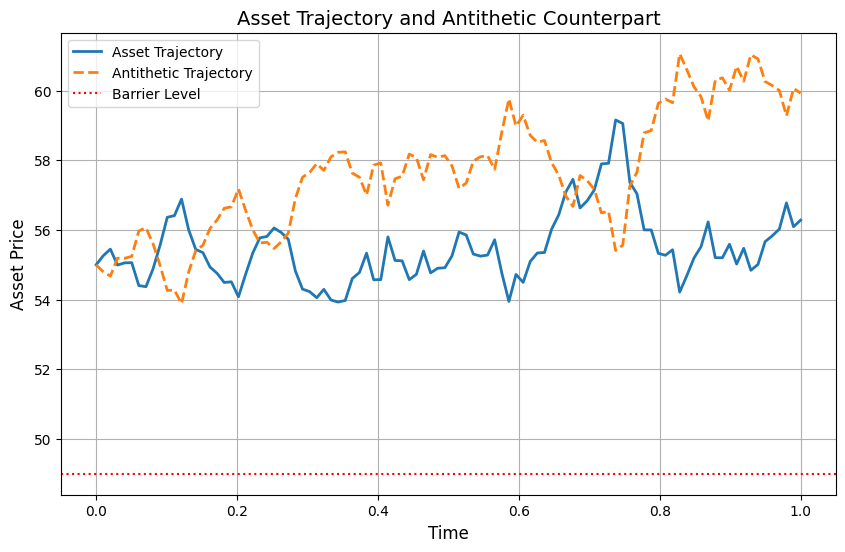

In [49]:
time = num.linspace(0, T, N)

plt.figure(figsize=(10, 6))
plt.plot(time, Svals, label="Asset Trajectory", linestyle='-', linewidth=2)
plt.plot(time, SvalsAnti, label="Antithetic Trajectory", linestyle='--', linewidth=2)
plt.axhline(y=B, color='red', linestyle=':', label="Barrier Level")
plt.title("Asset Trajectory and Antithetic Counterpart", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Asset Price", fontsize=12)
plt.legend()
plt.grid()
plt.show()

### Exercise Sheet 8

In [75]:
# Monte Carlo for an arithmetic average Asian call option using a control variate.

# Step 1. Define parameters

S = 55.;            # Current asset value
E = 52.;            # Strike price
T = 1.;             # Expiration time
r = 0.06;           # Risk free rate
sigma = 0.1;        # Volatility

M = 2500;            # Number of samples
N = 100;           # Number of steps taken for each trajectory
dt = T/N;         # Number of samples


# Step 2. Compute geometric average Asian call option exact value

sigsqT= (sigma**2)*T*(N+1)*(2*N+1)/(6*N*N);
muT = 0.5*sigsqT + (r-0.5*sigma**2)*T*(N+1)/(2*N);

d1 = (math.log(S/E)+(muT+0.5*sigsqT))/(math.sqrt(sigsqT));
d2 = d1 - math.sqrt(sigsqT);

N1 = 0.5*(1+math.erf(d1/math.sqrt(2)));
N2 = 0.5*(1+math.erf(d2/math.sqrt(2)));

geo =  math.exp(-r*T)*(S*math.exp(muT)*N1-E*N2);


# Step 3. Compute the ensemble of asset price trajectories
Spath=num.zeros((M,int(N)+1));      # Set up a placeholder M by N+1 array
Spath[:,0]=S;                       # Insert initial values

for i in range(0,M):
    for j in range(1,int(N)+1):
       Spath[i,j]=Spath[i,j-1]*math.exp((r-0.5*sigma**2)*dt+sigma*math.sqrt(dt)*num.random.normal(0,1,1)); 

    
# Step 4. Use brute force Monte Carlo to value the option
arithAvg = num.mean(Spath,axis=1);   # Arithmetic average of asset prices along each trajectory
pArith = math.exp(-r*T)*num.maximum(arithAvg-E,0);  # Compute payoff on each trajectory 
pMean = num.mean(pArith);           # Compute option value
pStd = num.std(pArith);             # Standard deviation of sampled option values
confIntMC = [pMean-1.96*pStd/math.sqrt(M), pMean+1.96*pStd/math.sqrt(M)]; # Confidence interval for our estimation of 
                                                                          # the option value.

print("Brute Force Method")
print(f"Estimated option value {pMean}");                       # Output estimated option value
print(f"Confidence interval for option value {confIntMC}");                   # Output CI for option value
print("\n")


# Step 5. Use the geometric average Asian call option value as a control variate
geoAvg = num.exp((1/(N+1))*num.sum(num.log(Spath),axis=1));    # Geometric average of asset prices along each trajectory. 
                #Note that we use num.exp() instead of math.exp() because the latter does not accept arrays as arguments.
pGeo = math.exp(-r*T)*num.maximum(geoAvg-E,0);          # Compute payoff on each trajectory. 
z = pArith + geo - pGeo;               # Control variate 
zMean = num.mean(z);                   # Compute option value
zStd = num.std(z);                     # Standard deviation of sampled option values
confIntCVMC = [zMean-1.96*zStd/math.sqrt(M), zMean+1.96*zStd/math.sqrt(M)]; # Confidence interval for our estimation of 
                                                                            #the option value.
print("Use the geometric average Asian call option value as a control variate")
print(f"Estimated option value {zMean}");                       # Output estimated option value
print(f"Confidence interval for option value {confIntCVMC}");                   # Output CI for option value


ratio = (confIntMC[0]-confIntMC[1])/(confIntCVMC[0]-confIntCVMC[1])
print("\n",f"Ratio of the length of the confidence intervals of the Brute Force Method to CV Method is {ratio} ")

Brute Force Method
Estimated option value 4.427271305909645
Confidence interval for option value [4.312973942801981, 4.54156866901731]


Use the geometric average Asian call option value as a control variate
Estimated option value 4.51595604764046
Confidence interval for option value [4.513843269494423, 4.5180688257864965]

 Ratio of the length of the confidence intervals of the Brute Force Method to CV Method is 54.098137716004175 


In [86]:
# Monte Carlo for an arithmetic average Asian call option using a control variate.

# Step 1. Define parameters

S = 55.;            # Current asset value
E = 52.;            # Strike price
T = 1.;             # Expiration time
r = 0.06;           # Risk free rate
sigma = 0.1;        # Volatility

M = 2500;            # Number of samples
N = 100;           # Number of steps taken for each trajectory
dt = T/N;         # Number of samples


# Step 2. Compute geometric average Asian call option exact value

sigsqT= (sigma**2)*T*(N+1)*(2*N+1)/(6*N*N);
muT = 0.5*sigsqT + (r-0.5*sigma**2)*T*(N+1)/(2*N);

d1 = (math.log(S/E)+(muT+0.5*sigsqT))/(math.sqrt(sigsqT));
d2 = d1 - math.sqrt(sigsqT);

N1 = 0.5*(1+math.erf(d1/math.sqrt(2)));
N2 = 0.5*(1+math.erf(d2/math.sqrt(2)));

geo =  math.exp(-r*T)*(S*math.exp(muT)*N1-E*N2);


# Step 3. Compute the ensemble of asset price trajectories
Spath=num.zeros((M,int(N)+1));      # Set up a placeholder M by N+1 array
Spath[:,0]=S;                       # Insert initial values

Z = num.random.normal(0,1,(M,N))
Spath=Spath[:]*math.exp((r-0.5*sigma**2)*dt+sigma*math.sqrt(dt)*Z); 

    
# Step 4. Use brute force Monte Carlo to value the option
arithAvg = num.mean(Spath,axis=1);   # Arithmetic average of asset prices along each trajectory
pArith = math.exp(-r*T)*num.maximum(arithAvg-E,0);  # Compute payoff on each trajectory 
pMean = num.mean(pArith);           # Compute option value
pStd = num.std(pArith);             # Standard deviation of sampled option values
confIntMC = [pMean-1.96*pStd/math.sqrt(M), pMean+1.96*pStd/math.sqrt(M)]; # Confidence interval for our estimation of 
                                                                          # the option value.

print("Brute Force Method")
print(f"Estimated option value {pMean}");                       # Output estimated option value
print(f"Confidence interval for option value {confIntMC}");                   # Output CI for option value
print("\n")


# Step 5. Use the geometric average Asian call option value as a control variate
geoAvg = num.exp((1/(N+1))*num.sum(num.log(Spath),axis=1));    # Geometric average of asset prices along each trajectory. 
                #Note that we use num.exp() instead of math.exp() because the latter does not accept arrays as arguments.
pGeo = math.exp(-r*T)*num.maximum(geoAvg-E,0);          # Compute payoff on each trajectory. 
z = pArith + geo - pGeo;               # Control variate 
zMean = num.mean(z);                   # Compute option value
zStd = num.std(z);                     # Standard deviation of sampled option values
confIntCVMC = [zMean-1.96*zStd/math.sqrt(M), zMean+1.96*zStd/math.sqrt(M)]; # Confidence interval for our estimation of 
                                                                            #the option value.
print("Use the geometric average Asian call option value as a control variate")
print(f"Estimated option value {zMean}");                       # Output estimated option value
print(f"Confidence interval for option value {confIntCVMC}");                   # Output CI for option value


ratio = (confIntMC[0]-confIntMC[1])/(confIntCVMC[0]-confIntCVMC[1])
print("\n",f"Ratio of the length of the confidence intervals of the Brute Force Method to CV Method is {ratio} ")

TypeError: only size-1 arrays can be converted to Python scalars

--------------

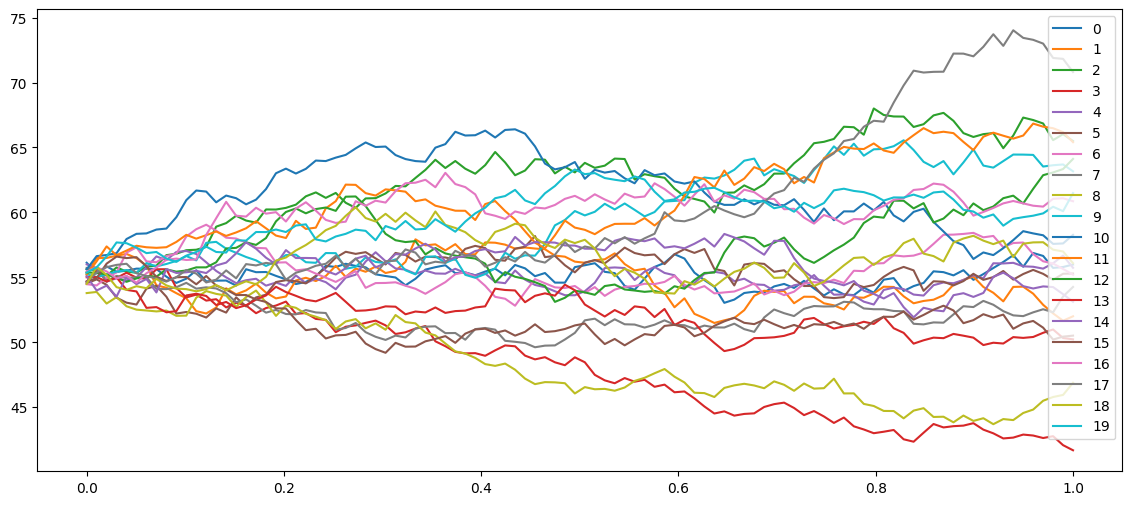

In [43]:
time = num.linspace(0, T, N)
plt.figure(figsize = (14,6))

for i in range(0,20):
    plt.plot(time,Spath[i,1:], label = f"{i}")


plt.legend()
plt.show()